#  1. Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

#  2. Análise Exploratória dos Dados

In [2]:
details = pd.read_csv('nba/games_details.csv')
games = pd.read_csv('nba/games.csv')

C:\Users\gabri\AppData\Local\Temp\ipykernel_10640\1687184930.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  details = pd.read_csv('nba/games_details.csv')


In [3]:
print(details.shape)
details.head()

(668628, 29)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [4]:
# Check out info of DataFrame
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

In [5]:
boxScore = details.loc[0:len(details),['GAME_ID','PLAYER_NAME', 'FGA', 'FGM', 'MIN','PTS']]
boxScore['FG%'] = boxScore['FGM'] / boxScore['FGA']

print(boxScore.shape)
boxScore.head()

(668628, 7)


,GAME_ID,PLAYER_NAME,FGA,FGM,MIN,PTS,FG%
0,22200477,Romeo Langford,1.0,1.0,18:06,2.0,1.000000
1,22200477,Jeremy Sochan,14.0,7.0,31:01,23.0,0.500000
2,22200477,Jakob Poeltl,9.0,6.0,21:42,13.0,0.666667
3,22200477,Devin Vassell,13.0,4.0,30:20,10.0,0.307692
4,22200477,Tre Jones,12.0,7.0,27:44,19.0,0.583333


In [6]:
gamesSeason = games.loc[0:len(games),['GAME_ID','SEASON']]
gamesSeason.head()

,GAME_ID,SEASON
0,22200477,2022
1,22200478,2022
2,22200466,2022
3,22200467,2022
4,22200468,2022


In [7]:
playerScore = pd.merge(boxScore, gamesSeason, on='GAME_ID')
playerScore.head()

,GAME_ID,PLAYER_NAME,FGA,FGM,MIN,PTS,FG%,SEASON
0,22200477,Romeo Langford,1.0,1.0,18:06,2.0,1.000000,2022
1,22200477,Jeremy Sochan,14.0,7.0,31:01,23.0,0.500000,2022
2,22200477,Jakob Poeltl,9.0,6.0,21:42,13.0,0.666667,2022
3,22200477,Devin Vassell,13.0,4.0,30:20,10.0,0.307692,2022
4,22200477,Tre Jones,12.0,7.0,27:44,19.0,0.583333,2022


In [8]:
dataPlayer = playerScore.loc[playerScore['PLAYER_NAME'] == 'Stephen Curry']
print(dataPlayer.shape)
dataPlayer.head()

(1102, 8)


,GAME_ID,PLAYER_NAME,FGA,FGM,MIN,PTS,FG%,SEASON
1399,22200415,Stephen Curry,19.0,11.0,29:33,38.0,0.578947,2022
1649,22200410,Stephen Curry,17.0,6.0,27:19,20.0,0.352941,2022
2242,22200392,Stephen Curry,21.0,12.0,37:26,32.0,0.571429,2022
3167,22200359,Stephen Curry,17.0,3.0,37:42,12.0,0.176471,2022
3517,22200342,Stephen Curry,21.0,10.0,34:32,30.0,0.476190,2022


In [9]:
dataPlayer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1102 entries, 1399 to 669413
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GAME_ID      1102 non-null   int64  
 1   PLAYER_NAME  1102 non-null   object 
 2   FGA          1065 non-null   float64
 3   FGM          1065 non-null   float64
 4   MIN          1065 non-null   object 
 5   PTS          1065 non-null   float64
 6   FG%          1063 non-null   float64
 7   SEASON       1102 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 77.5+ KB


In [10]:
dataPlayer.describe()

,GAME_ID,FGA,FGM,PTS,FG%,SEASON
count,1.102000e+03,1065.000000,1065.000000,1065.000000,1063.000000,1102.000000
mean,2.330296e+07,17.592488,8.281690,24.335211,0.466729,2015.057169
std,7.402153e+06,5.380026,3.346737,9.881693,0.125123,3.747891
min,1.090000e+07,0.000000,0.000000,0.000000,0.000000,2009.000000
25%,2.120013e+07,14.000000,6.000000,17.000000,0.388889,2012.000000
50%,2.150061e+07,18.000000,8.000000,24.000000,0.466667,2015.000000
75%,2.200032e+07,21.000000,11.000000,31.000000,0.549194,2018.000000
max,5.200021e+07,36.000000,20.000000,62.000000,1.000000,2022.000000


In [11]:
dataPlayer[["MINS", "SECS"]] = dataPlayer.MIN.str.extract(r"([^:]+):(.*)")
dataPlayer.loc[(~dataPlayer.MIN.str.contains(':', na = True)), 'SECS'] = dataPlayer.MIN
dataPlayer.MINS = pd.to_numeric(dataPlayer.MINS)
dataPlayer.SECS = pd.to_numeric(dataPlayer.SECS)

dataPlayer['PLAY_TIME'] = np.round(dataPlayer.MINS.fillna(0) + dataPlayer.SECS/60)


pointsSeason = pd.DataFrame(columns=['season', 'ppg', 'games', 'minutes', 'total_points', 'total_minutes'], dtype=int)

for i in range(dataPlayer['SEASON'].min(),dataPlayer['SEASON'].max()):
    scoreSeason = dataPlayer.loc[dataPlayer['SEASON'] == i]
    scoreSeason = scoreSeason.loc[scoreSeason['PLAY_TIME'] > 0]
    points = scoreSeason['PTS'].sum() / len(scoreSeason)
    minutes = scoreSeason['PLAY_TIME'].mean()
    total_points = scoreSeason['PTS'].sum()
    total_minutes = scoreSeason['PLAY_TIME'].sum()
    newRow = {'season': i, 'ppg': round(points, 2), 'games': len(scoreSeason), 'minutes': round(minutes,2), 'total_points': total_points, 'total_minutes': total_minutes}
    pointsSeason.loc[len(pointsSeason)] = newRow

print(pointsSeason.shape)
pointsSeason.head()

(13, 6)


C:\Users\gabri\AppData\Local\Temp\ipykernel_10640\2411384353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPlayer[["MINS", "SECS"]] = dataPlayer.MIN.str.extract(r"([^:]+):(.*)")
C:\Users\gabri\AppData\Local\Temp\ipykernel_10640\2411384353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPlayer[["MINS", "SECS"]] = dataPlayer.MIN.str.extract(r"([^:]+):(.*)")
C:\Users\gabri\AppData\Local\Temp\ipykernel_10640\2411384353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,season,ppg,games,minutes,total_points,total_minutes
0,2009,17.37,83,34.92,1442.0,2898.0
1,2010,18.39,77,32.38,1416.0,2493.0
2,2011,15.58,26,28.04,405.0,729.0
3,2012,22.97,90,38.70,2067.0,3483.0
4,2013,23.85,88,35.69,2099.0,3141.0


<Axes: title={'center': 'Stephen Curry Pontos por temporada'}, xlabel='season'>

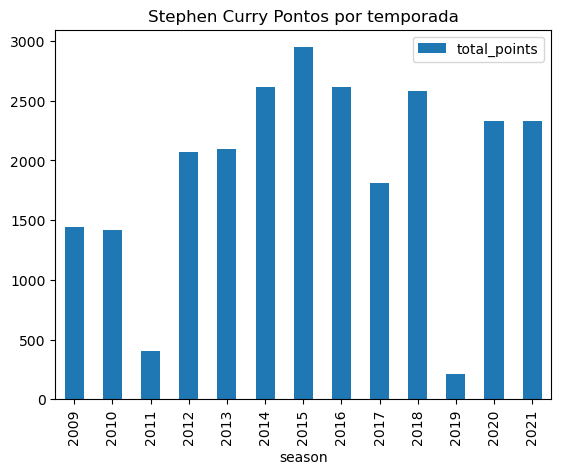

In [12]:
pointsSeason.plot(x="season", y="total_points", title="Stephen Curry Pontos por temporada", kind="bar")

<Axes: title={'center': 'Stephen Curry Minutos por temporada'}, xlabel='season'>

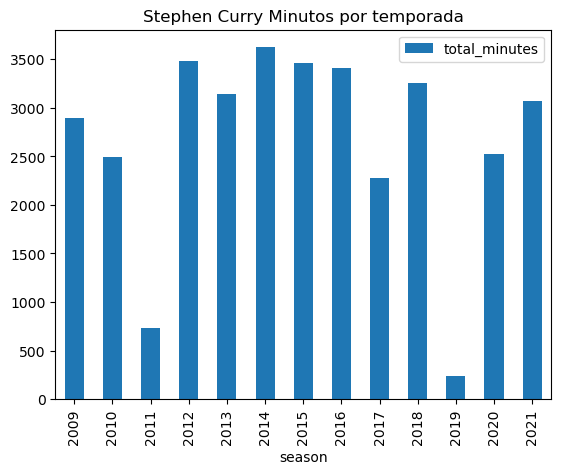

In [13]:
pointsSeason.plot(x="season", y="total_minutes", title="Stephen Curry Minutos por temporada", kind="bar")

<Axes: title={'center': 'Stephen Curry Média de Pontos por temporada'}, xlabel='season'>

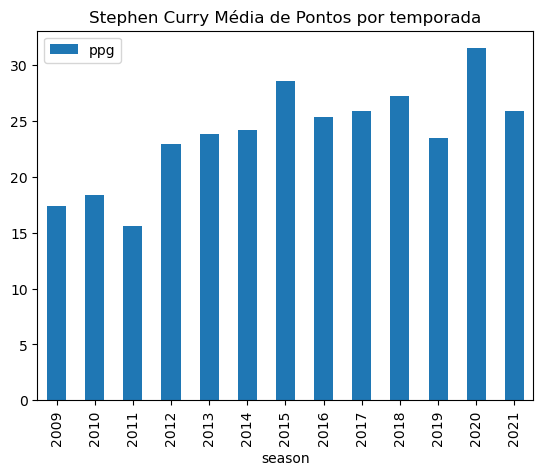

In [14]:
pointsSeason.plot(x="season", y="ppg", title="Stephen Curry Média de Pontos por temporada", kind="bar")

<Axes: title={'center': 'Stephen Curry Média de minutos por temporada'}, xlabel='season'>

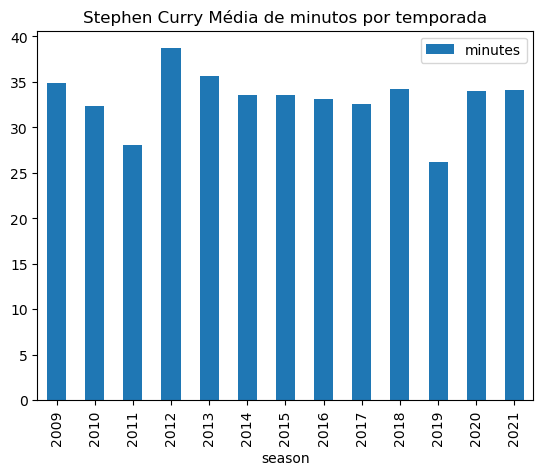

In [15]:
pointsSeason.plot(x="season", y="minutes", title="Stephen Curry Média de minutos por temporada", kind="bar")

c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


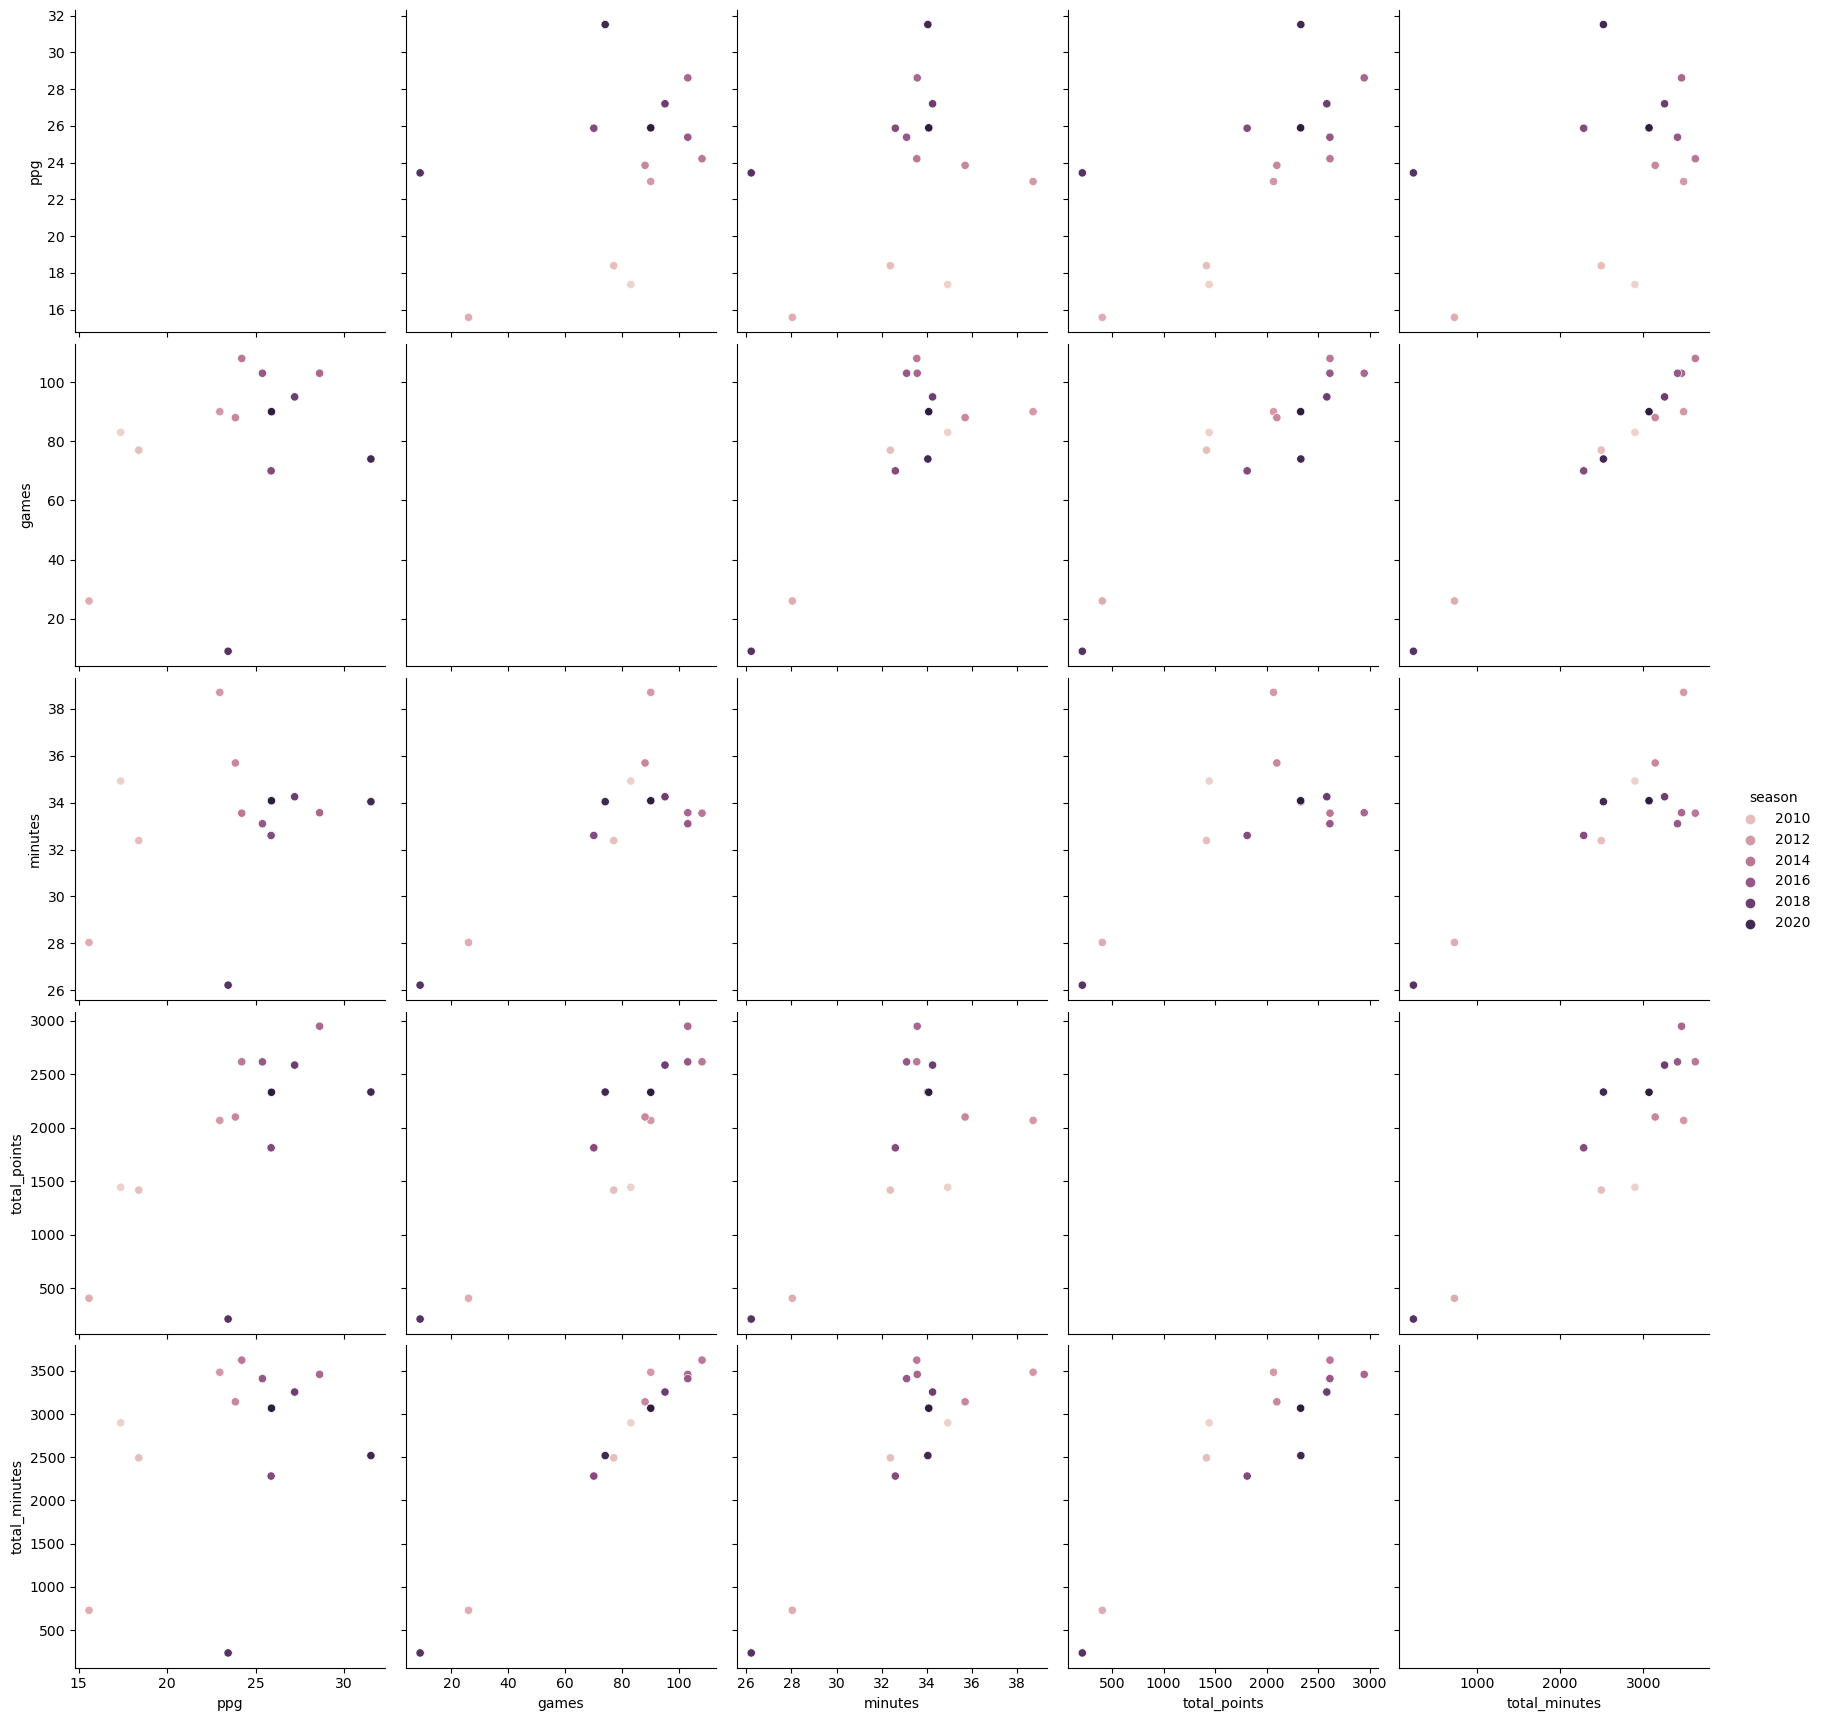

In [16]:
sns.pairplot(pointsSeason, hue='season', height=3.5);

c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


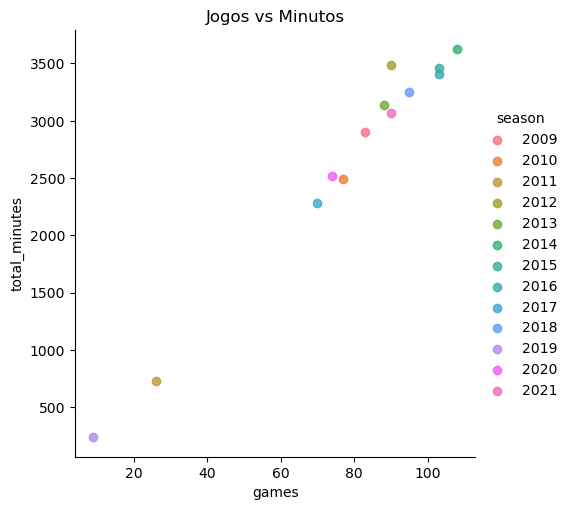

In [17]:
sns.lmplot(x='games', y='total_minutes', data=pointsSeason,
           fit_reg=False,
           hue='season')

plt.title('Jogos vs Minutos')

# mostra o gráfico
plt.show()

c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


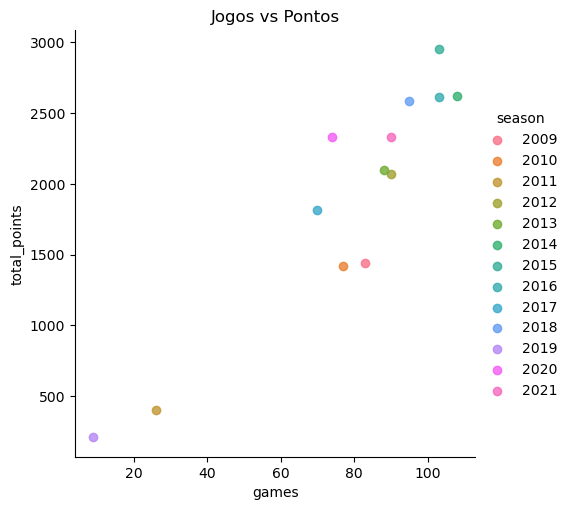

In [18]:
sns.lmplot(x='games', y='total_points', data=pointsSeason,
           fit_reg=False,
           hue='season')

plt.title('Jogos vs Pontos')

# mostra o gráfico
plt.show()

c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


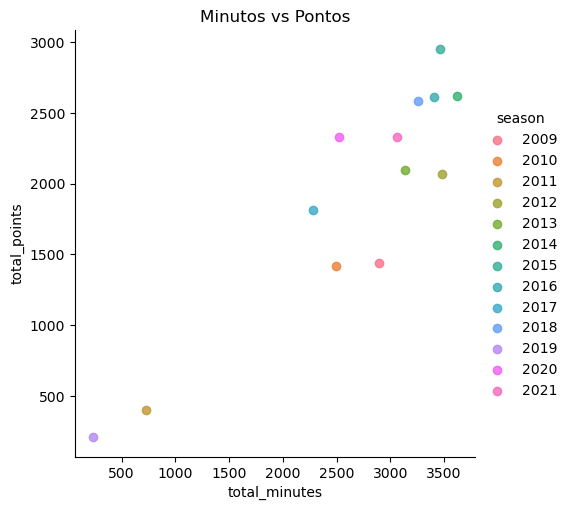

In [19]:
sns.lmplot(x='total_minutes', y='total_points', data=pointsSeason,
           fit_reg=False,
           hue='season')

plt.title('Minutos vs Pontos')

# mostra o gráfico
plt.show()



Matriz de correlação: 


,ppg,games,minutes,total_points,total_minutes
ppg,1.000000,0.391110,0.271944,0.680936,0.382205
games,0.391110,1.000000,0.808070,0.930714,0.990673
minutes,0.271944,0.808070,1.000000,0.709540,0.872772
total_points,0.680936,0.930714,0.709540,1.000000,0.914688
total_minutes,0.382205,0.990673,0.872772,0.914688,1.000000


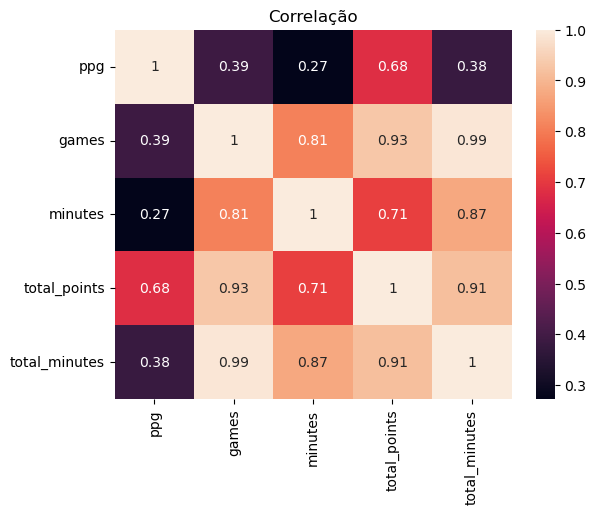

In [20]:
df_correlation = pointsSeason.loc[0:len(games),['ppg','games','minutes','total_points','total_minutes']].corr()

print('\n\nMatriz de correlação: ')
display(df_correlation)

# cria um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, annot=True,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

# 3. Pré-processamento dos Dados